# Auditory Task 8 - Neural Networks & Deep Learning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from xgboost import XGBClassifier

### klasifikacija so nevronski mrezi

In [8]:
df=pd.read_csv('heart.csv')

In [10]:
df.sample(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0


In [12]:
numerical_features=['age','trestbps','chol','thalach','oldpeak']

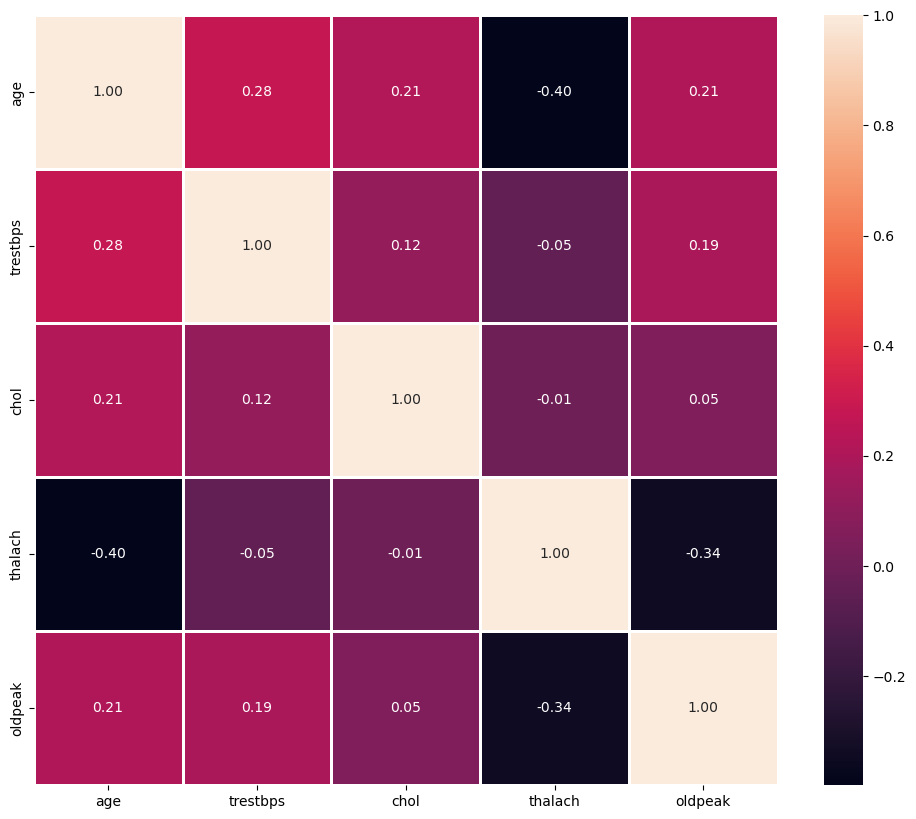

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

<Axes: xlabel='target', ylabel='count'>

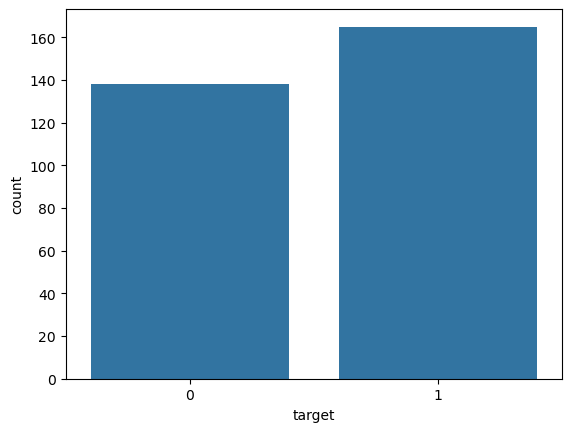

In [16]:
sns.countplot(df, x="target")

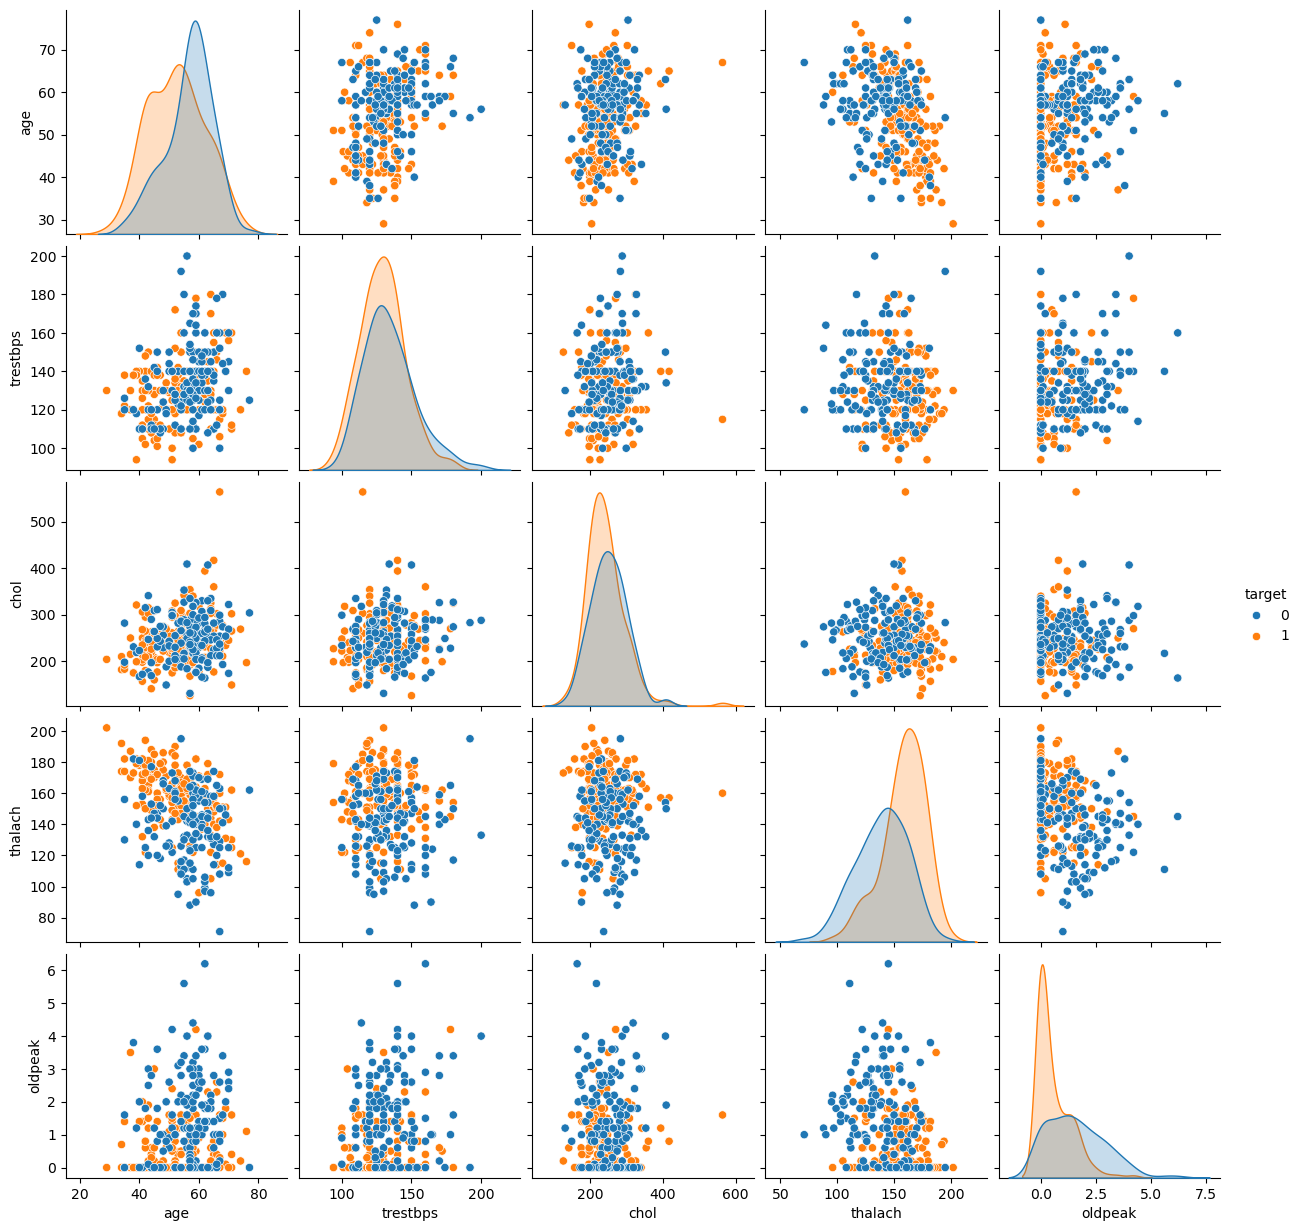

In [18]:
sns.pairplot(df, vars=numerical_features, hue="target")

In [20]:
X, y = df.drop(columns=["target"]), df["target"]

In [22]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

##### dava kolku koloni ima X

In [34]:
X.shape[1]

13

In [38]:
model=Sequential([
    Input(shape=(X.shape[1],)),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(1, kernel_initializer="uniform", activation="sigmoid"),
])

##### shape=(X.shape[1],): Подразбира дека секој пример во податочниот сет има број на карактеристики еднаков на бројот на колони во X
има 3 скриени слоеви со 32 16 и 16 неврони и со активациска ф-ја релу поради тоа што има класификација бинарна
најчесто се користи релу со сигмоид во крајниот или евентуално leaky-relu наместо релу

In [43]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

loss ф-јата е бинарна кросентрпија поради тоа што таргетот е 0 или 1

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,265 (4.94 KB)

 Trainable params: 1,265 (4.94 KB)

 Non-trainable params: 0 (0.00 B)

##### Епоха е еден целосен премин низ податочниот сет за тренирање.
Мал сет на податоци: 10-50 епохи. 
Среден/Голем сет на податоци: 50-200 епохи (или повеќе ако користиш early stopping).
##### Бач големината одредува колку примери од податочниот сет се обработуваат во една итерација.
Започни со бач големина од 32 или 64.
Експериментирај: пробај повеќе вредности (16, 32, 64, 128) и следи како влијаат на валидациската загуба и времето за тренирање.

In [49]:
history = model.fit(train_X, train_y, validation_split=0.1, epochs=32, batch_size=16)

Epoch 1/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4779 - loss: 0.6932 - val_accuracy: 0.5600 - val_loss: 0.6928
Epoch 2/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5719 - loss: 0.6927 - val_accuracy: 0.5600 - val_loss: 0.6925
Epoch 3/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5325 - loss: 0.6928 - val_accuracy: 0.5600 - val_loss: 0.6922
Epoch 4/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - loss: 0.6927 - val_accuracy: 0.5600 - val_loss: 0.6918
Epoch 5/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5381 - loss: 0.6921 - val_accuracy: 0.5600 - val_loss: 0.6908
Epoch 6/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5802 - loss: 0.6899 - val_accuracy: 0.5600 - val_loss: 0.6884
Epoch 7/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5962 - loss: 0.6862 - val_accuracy: 0.7600 - val_loss: 0.6815
Epoch 8/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7543 - loss: 0.6782 - val_accuracy: 0.8400 - val_loss

<Axes: >

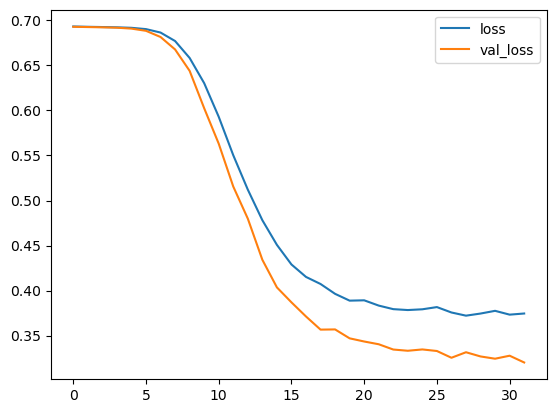

In [56]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [58]:
pred_y = model.predict(test_X).round()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


<Axes: >

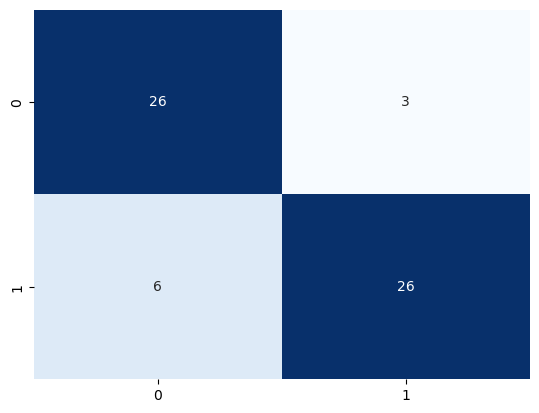

In [60]:
cm = confusion_matrix(test_y, pred_y)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

In [62]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



### XGBoost za sporedba so nn

In [67]:
classifier = XGBClassifier(n_estimators=50, learning_rate=0.01)

In [69]:
classifier.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
pred_y = classifier.predict(test_X)

In [73]:
print(classification_report(test_y, pred_y))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### заклучок
Користи XGBoost за:
Табеларни податоци.
Кога податоците се мали до средни по големина.
Брзи резултати или објаснивост на моделот.


Користи Невронски мрежи за:
Сложени, неструктурирани податоци (слики, текст, аудио).
Големи сетови на податоци.
Кога целта е да се искористат предности на длабоко учење.

#### Мал сет на податоци обично се смета за податоци со неколку стотици до неколку илјади примери (на пример, 100-10,000 примери).

Среден сет на податоци се смета кога има неколку илјади до неколку десетици илјади примери (на пример, 10,000-100,000 примери).

Голем сет на податоци се смета за податоци со стотици илјади до милиони примери (на пример, 100,000+ примери).

Мал сет на податоци е најдобро да се обработува со помалку комплексни модели и со техники како regularization, cross-validation, и early stopping.
Среден сет на податоци може да користи основни невронски мрежи или XGBoost, со внимание на overfitting.
Голем сет на податоци бара длабоки мрежи и распределено обработување, што може да вклучува напредни техники за обработка на големи податоци.

## Regresija so NN

In [84]:
df = pd.read_csv('Admission_Predict.csv')

In [92]:
df.sample(4)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
47,48,339,119,5,4.5,4.0,9.70,0,0.89
301,302,319,108,2,2.5,3.0,8.76,0,0.66
263,264,324,111,3,2.5,1.5,8.79,1,0.70
23,24,334,119,5,5.0,4.5,9.70,1,0.95


In [94]:
df.drop(columns=["Serial No."], inplace=True)

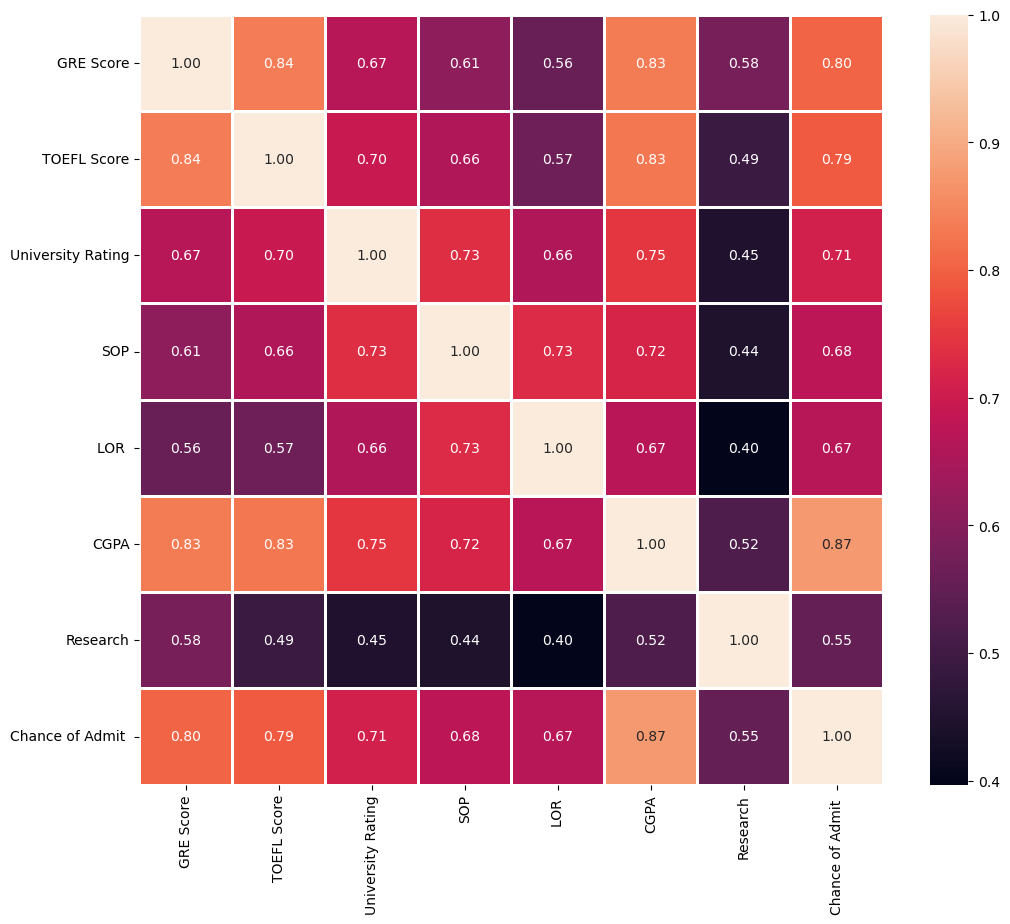

In [96]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

<Axes: xlabel='Chance of Admit ', ylabel='Count'>

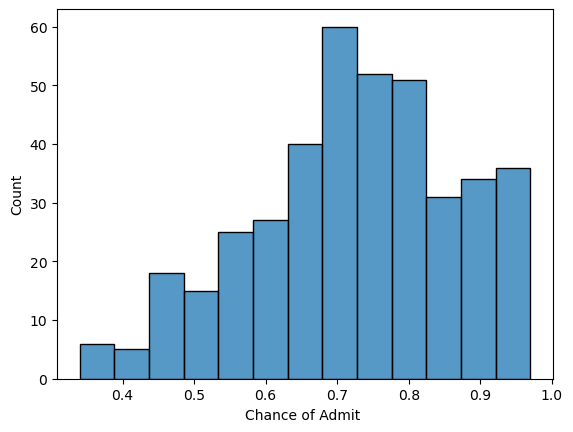

In [98]:
sns.histplot(df, x="Chance of Admit ")

In [100]:
X, y = df.drop(columns=["Chance of Admit "]), df["Chance of Admit "]

In [102]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [106]:
X.shape[1]

7

In [108]:
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dropout(0.1),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(1, kernel_initializer="uniform", activation="linear"),
])

Dropout(0.1): Исклучува 10% од невроните (случајно) во текот на секоја итерација за да спречи претерано прилагодување (overfitting).

наместо uniform за регресија so relu можат да бидат добри и he_uniform или he_normal за кернел иницијализација


Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation="relu")
за да не дојде до overfitting може и да асе стави регуларизација


In [112]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,857 (7.25 KB)

 Trainable params: 1,857 (7.25 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"]
)

In [118]:
history = model.fit(train_X, train_y, validation_split=0.1, epochs=32, batch_size=16)

Epoch 1/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.5334 - mean_squared_error: 0.5334 - val_loss: 0.5617 - val_mean_squared_error: 0.5617
Epoch 2/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4672 - mean_squared_error: 0.4672 - val_loss: 0.4010 - val_mean_squared_error: 0.4010
Epoch 3/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2732 - mean_squared_error: 0.2732 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 4/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 5/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 6/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 7/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0045 - val_mean

<Axes: >

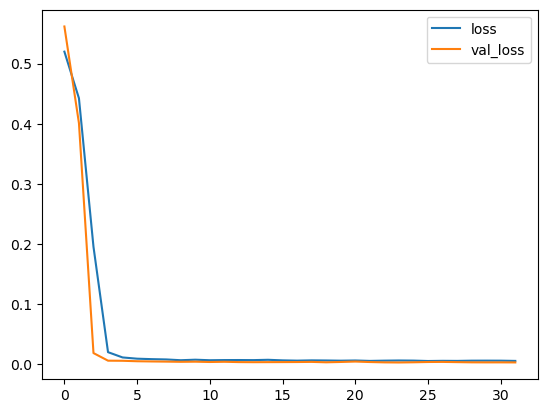

In [120]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [122]:
pred_y = model.predict(test_X)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [124]:
r2_score(test_y, pred_y)

0.7908792413413221

#### proba so henormal namesto uniform

In [154]:
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(32, kernel_initializer="he_normal", activation="relu"),
    Dropout(0.1),
    Dense(32, kernel_initializer="he_normal", activation="relu"),
    Dense(16, kernel_initializer="he_normal", activation="relu"),
    Dense(1, kernel_initializer="he_normal", activation="linear"),
])

In [156]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"]
)

In [158]:
history = model.fit(train_X, train_y, validation_split=0.1, epochs=32, batch_size=32)

Epoch 1/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.5302 - mean_squared_error: 1.5302 - val_loss: 0.7831 - val_mean_squared_error: 0.7831
Epoch 2/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5656 - mean_squared_error: 0.5656 - val_loss: 0.1848 - val_mean_squared_error: 0.1848
Epoch 3/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1492 - mean_squared_error: 0.1492 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 4/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 5/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 6/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 7/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.0177 - val_mean_squared_er

<Axes: >

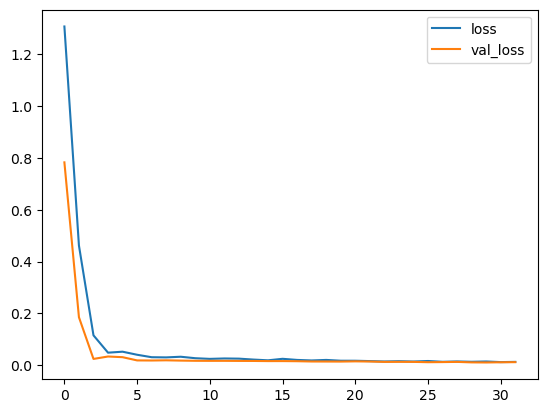

In [160]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [162]:
pred_y = model.predict(test_X)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [164]:
r2_score(test_y, pred_y)

0.641373464491666